<font color = green>

<font size="10" color="green">
Task about lakes
</font>

* Generate 20 random variable from 1 to 100
* Draw the plot of the sequence
* Lets assume each point represent the height and so all plotting is 2d mountains.
* Then consider the unlimited rain from above - cavities become lakes full of water.
* Determine the deepest lake

</font>

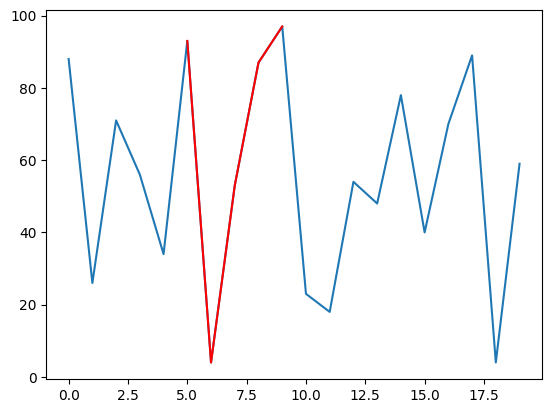

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def find_min_and_max(a):
    min_index = np.argmin(a)
    left_max_index = np.argmax(a[:min_index+1])
    right_max_index = min_index + 1 + np.argmax(a[min_index+1:])
    return left_max_index, min_index, right_max_index

#np.random.seed(2023)
a = np.random.randint(1, 100, 20)

plt.plot(a)

left_max, min_index, right_max = find_min_and_max(a)

plt.plot(range(left_max, right_max+1), a[left_max:right_max+1], c='red')

plt.show()

<font color = green>

<font size="10" color="green">
Task about sum and product
</font>

Note: This is optional task. However it is also evaluated and so you will get extra points to final score. Thus, we encourage you to solve it.

There are two whole numbers:
1 < a,b <100

One scientist("Sum") get provided with sum of numbers,
another  ("Prod") get provided with product of numbers. 
Both scientists know that numbers 1 < a,b <100.

Determine the numbers being based on the following dialog: 
- Prod: I don't know the numbers;
- Sum: I know it;
- Prod: then I know the numbers; 
- Sum: then I know the numbers too.

</font>

In [7]:
limit = 100

# Створюємо словник для зберігання кількості входжень кожного добутку x * y до їх розмови.
allowable_products_before = {} 
for x in range(2, limit): 
    for y in range(x + 1, limit - x): 
        product = x * y
        # Якщо цей добуток ще не був зустрінутий, додаємо його до словника.
        if product not in allowable_products_before: 
            allowable_products_before[product] = 1 
        # Якщо цей добуток вже був, збільшуємо кількість його входжень.
        else:
            allowable_products_before[product] += 1

# Створюємо словник для зберігання заборонених сум x + y, коли P говорить "Я не знаю".
not_allowed_say_p = {}  
for x in range(2, limit): 
    for y in range(x + 1, limit - x): 
        product = x * y
        # Якщо кількість входжень цього добутку дорівнює 1, то сума x + y недопустима.
        if allowable_products_before[product] == 1 :
            not_allowed_say_p[x + y] = 1  

# Створюємо словник для зберігання кількості входжень кожного добутку x * (n - x),
# де n є сумою x і y, яка не була відмічена як недопустима.
allowable_products_after_p = {} 
for n in range(2, limit):
    if n not in not_allowed_say_p:
       for x in range(2, n // 2 + 1):
            product = x * (n - x)
            # Якщо цей добуток входить до списку розмови та має більше одного входження,
            # додаємо його до словника.
            if product in allowable_products_before and allowable_products_before[product] > 1:
               if product in allowable_products_after_p:
                   allowable_products_after_p[product] += 1
               else:
                   allowable_products_after_p[product] = 1 

# Створюємо словник для зберігання кількості входжень суми x + y,
# яка може бути поділена на x і (n - x), коли S говорить "Я не знаю".
allowable_say_s = {}  
for n in range(2, limit):
    if n not in not_allowed_say_p:
       for x in range(2, n // 2 + 1):
           product = x * (n - x)
           # Якщо цей добуток входить до списку розмови та має тільки одне входження,
           # додаємо його до словника.
           if product in allowable_products_after_p and allowable_products_after_p[product] == 1:
               if n in allowable_say_s:
                   allowable_say_s[n] += 1
               else:
                   allowable_say_s[n] = 1

# Виводимо результати, де кількість входжень суми n дорівнює 1.
for n in allowable_say_s: 
    if allowable_say_s[n] == 1:
        for x in range(2, n // 2 + 1):
            product = x * (n - x)
            # Якщо цей добуток входить до списку розмови та має тільки одне входження,
            # виводимо його разом з значеннями x та (n - x).
            if product in allowable_products_after_p and allowable_products_after_p[product] == 1:
                print('(Сума, Добуток) = (%d, %d), (x, y) = (%d, %d)' % (n, product, x, n - x))


(Сума, Добуток) = (17, 52), (x, y) = (4, 13)
